In [1]:
%pip install numpy matplotlib pandas scikit-learn

  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('Telco_Customer_Churn.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [13]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

<Axes: >

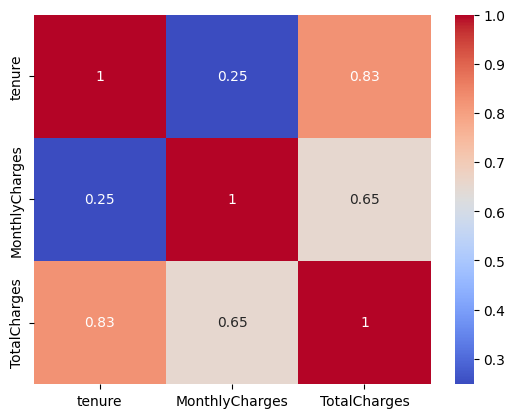

In [15]:
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap='coolwarm')

In [25]:
#catrgorical Features hypothesis testing
from scipy.stats import chi2_contingency

features_list = df.columns

In [26]:
features_list

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')

In [28]:
features_list = list(features_list)

In [29]:
features_list.remove('customerID')

In [31]:
for feature in features_list:
    if df[feature].dtype == 'str':
        contingency_table = pd.crosstab(df[feature], df['Churn'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Feature: {feature}, p-value: {p}")
        if p < 0.05:
            print(f"Feature '{feature}' is significantly associated with Churn.")
        else:
            print(f"Feature '{feature}' is NOT significantly associated with Churn.")
        print("-" * 50)

Feature: gender, p-value: 0.48657873605618596
Feature 'gender' is NOT significantly associated with Churn.
--------------------------------------------------
Feature: Partner, p-value: 2.1399113440759935e-36
Feature 'Partner' is significantly associated with Churn.
--------------------------------------------------
Feature: Dependents, p-value: 4.9249216612154196e-43
Feature 'Dependents' is significantly associated with Churn.
--------------------------------------------------
Feature: PhoneService, p-value: 0.3387825358066928
Feature 'PhoneService' is NOT significantly associated with Churn.
--------------------------------------------------
Feature: MultipleLines, p-value: 0.0034643829548773
Feature 'MultipleLines' is significantly associated with Churn.
--------------------------------------------------
Feature: InternetService, p-value: 9.571788222840544e-160
Feature 'InternetService' is significantly associated with Churn.
--------------------------------------------------
Feature

In [32]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [36]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [59]:
important_features = ['tenure','MonthlyCharges','TotalCharges','Contract','PaymentMethod','InternetService']

In [38]:
#EDA on whole dataset

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A) Demogrphic
  Gender,  Age Range, Partner and Dependent status

  1.Gender Distribution

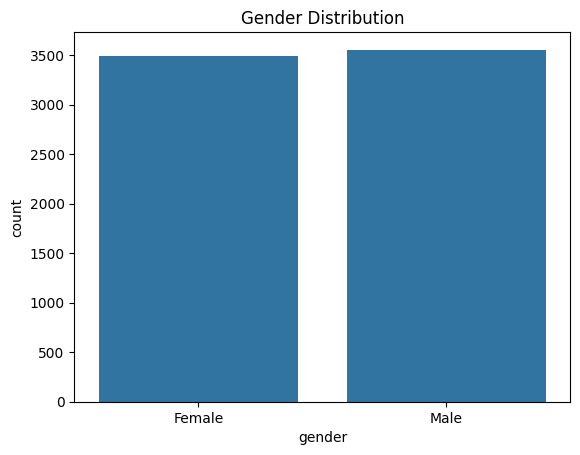

In [39]:
# EDA on gender distribution

sns.countplot(x='gender',data=df)
plt.title('Gender Distribution')
plt.show()

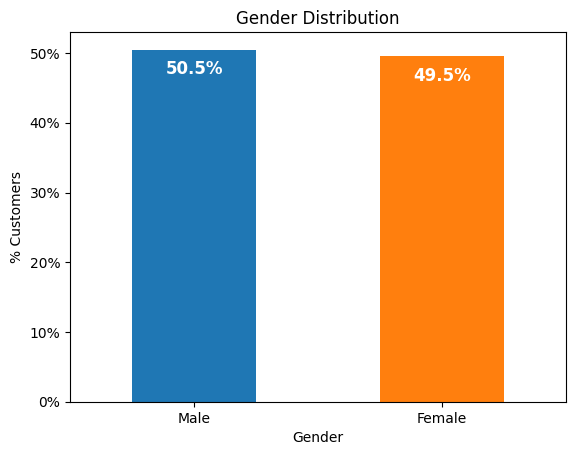

In [42]:
import matplotlib.ticker as mtick
colors = ['#1f77b4', '#ff7f0e']
gender_counts = df['gender'].value_counts()
ax = (gender_counts * 100.0 / len(df)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

#iterate over the bars heights and labels to the bars

total = gender_counts.sum()
for bar, count in zip(ax.patches, gender_counts):
    percentage = count / total * 100
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() -3.5,
            f'{percentage:.1f}%', ha='center', color='white', fontsize=12, fontweight='bold')
plt.show()

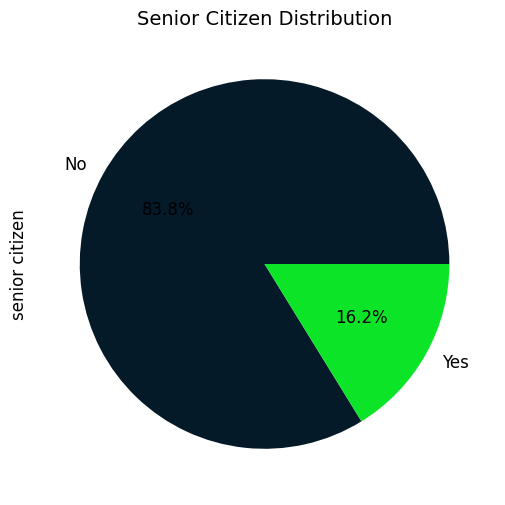

In [43]:
# Senior Citizen Distribution

ax =(df['SeniorCitizen'].value_counts() * 100.0 / len(df)).plot.pie(autopct='%1.1f%%', labels = ['No', 'Yes'], figsize=(6,6), fontsize=12, colors=["#051a29", "#0ce428"])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('senior citizen', fontsize=12)
ax.set_title('Senior Citizen Distribution', fontsize=14)
plt.show()

TypeError: cannot unpack non-iterable numpy.float64 object

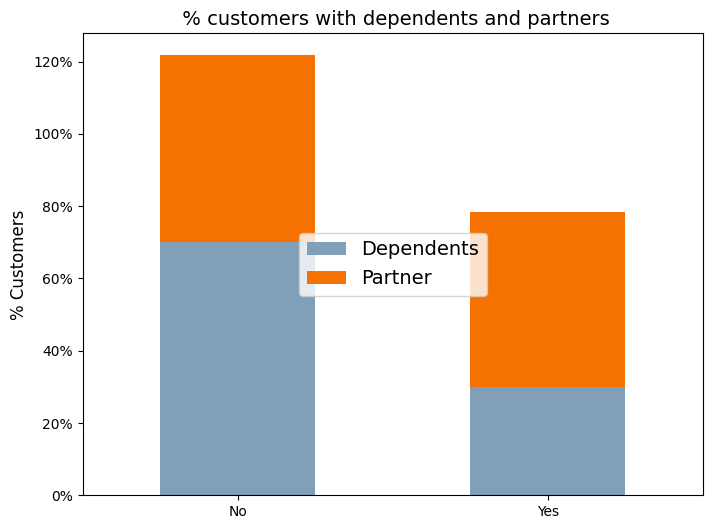

In [48]:
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])
df3 = df2.groupby(['value', 'variable']).count().unstack()
df3 = df3 * 100.0 / len(df)
colors = ["#81a0b7", "#f57200"]
ax = df3.loc[:, 'customerID'].plot(kind='bar', stacked=True, color=colors, figsize =(8,6), rot=0, width = 0.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=12)
ax.set_xlabel('')
ax.set_title(' % customers with dependents and partners', size=14)
ax.legend(loc = 'center', prop = {'size':14})

for patch in ax.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    ax.annotate('{:.0f}%'.format(float(height)), (x + 0.25*width, y + 0.4*height),
                color='white', fontsize=12, fontweight='bold')
plt.show()

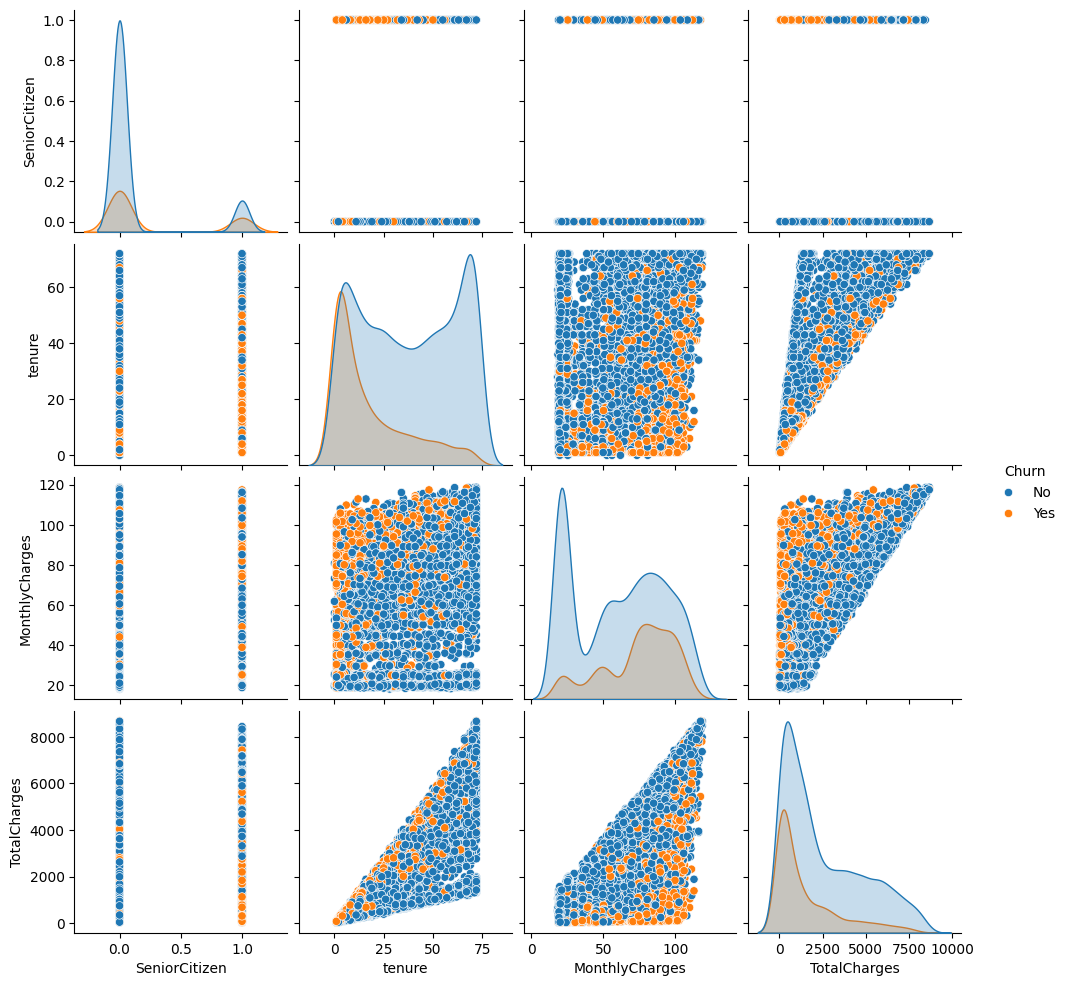

In [47]:
sns.pairplot(df.drop('customerID', axis=1), hue='Churn', diag_kind='kde')

In [60]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [158]:
important_features

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Contract',
 'PaymentMethod',
 'InternetService']

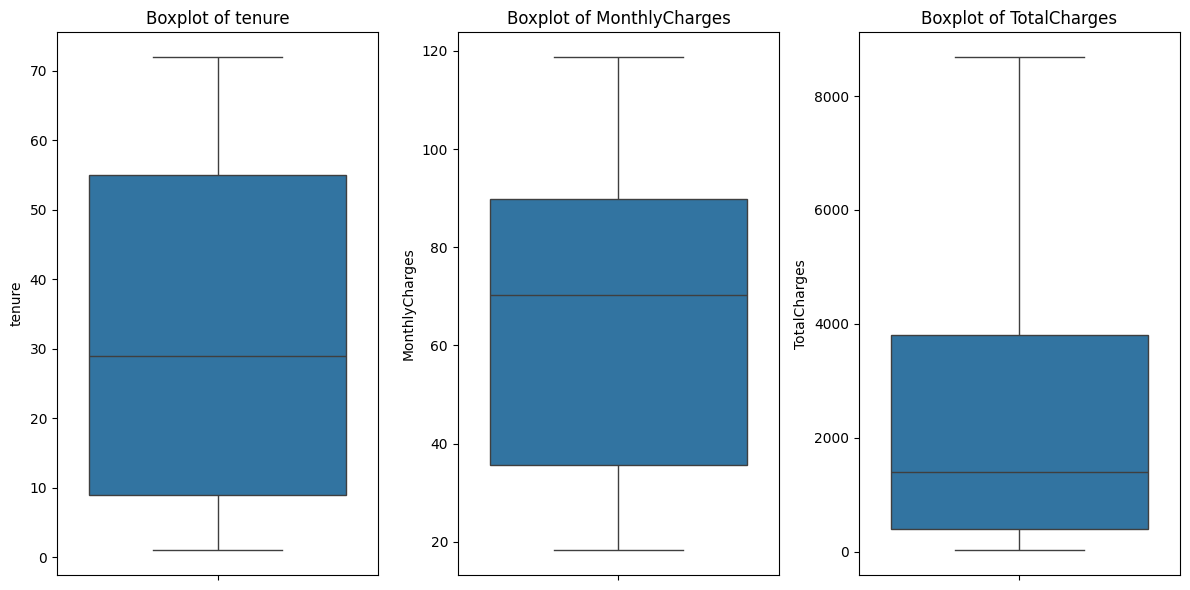

In [159]:
#outliers detection
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [160]:
important_features

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Contract',
 'PaymentMethod',
 'InternetService']

In [161]:
df.dropna(inplace=True)

In [162]:
x = df[important_features]
y = df['Churn']

In [163]:
x.head()    

,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,InternetService
0,1,29.85,29.85,Month-to-month,Electronic check,DSL
1,34,56.95,1889.50,One year,Mailed check,DSL
2,2,53.85,108.15,Month-to-month,Mailed check,DSL
3,45,42.30,1840.75,One year,Bank transfer (automatic),DSL
4,2,70.70,151.65,Month-to-month,Electronic check,Fiber optic


In [164]:
from sklearn.preprocessing import LabelEncoder
contract_label_encoder = LabelEncoder()
payment_method_encoder = LabelEncoder()
internet_service_encoder = LabelEncoder()
contract = contract_label_encoder.fit_transform(x['Contract'])
payment_method = payment_method_encoder.fit_transform(x['PaymentMethod'])
internet_service = internet_service_encoder.fit_transform(x['InternetService'])

In [166]:
contract[:5], payment_method[:5], internet_service[:5]

(array([0, 1, 0, 1, 0]), array([2, 3, 3, 0, 2]), array([0, 0, 0, 0, 1]))

In [167]:
x["Contract_Encoded"] = contract
x["PaymentMethod_Encoded"] = payment_method
x["InternetService_Encoded"] = internet_service

In [168]:
x.head()

,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,InternetService,Contract_Encoded,PaymentMethod_Encoded,InternetService_Encoded
0,1,29.85,29.85,Month-to-month,Electronic check,DSL,0,2,0
1,34,56.95,1889.50,One year,Mailed check,DSL,1,3,0
2,2,53.85,108.15,Month-to-month,Mailed check,DSL,0,3,0
3,45,42.30,1840.75,One year,Bank transfer (automatic),DSL,1,0,0
4,2,70.70,151.65,Month-to-month,Electronic check,Fiber optic,0,2,1


In [169]:
x = x[['tenure','MonthlyCharges','TotalCharges','Contract_Encoded','PaymentMethod_Encoded','InternetService_Encoded']]

In [170]:
x.head()

,tenure,MonthlyCharges,TotalCharges,Contract_Encoded,PaymentMethod_Encoded,InternetService_Encoded
0,1,29.85,29.85,0,2,0
1,34,56.95,1889.50,1,3,0
2,2,53.85,108.15,0,3,0
3,45,42.30,1840.75,1,0,0
4,2,70.70,151.65,0,2,1


In [171]:
y = df['Churn'].replace({'No': 0, 'Yes': 1})

In [172]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: object

In [173]:
imbalanced_data = pd.concat([x, y], axis=1)

In [174]:
imbalanced_data

,tenure,MonthlyCharges,TotalCharges,Contract_Encoded,PaymentMethod_Encoded,InternetService_Encoded,Churn
0,1,29.85,29.85,0,2,0,0
1,34,56.95,1889.50,1,3,0,0
2,2,53.85,108.15,0,3,0,1
3,45,42.30,1840.75,1,0,0,0
4,2,70.70,151.65,0,2,1,1
...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,3,0,0
7039,72,103.20,7362.90,1,1,1,0
7040,11,29.60,346.45,0,2,0,0
7041,4,74.40,306.60,0,3,1,1


In [82]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [175]:
#over sampler process
from imblearn.over_sampling import RandomOverSampler

#check original class distribution
print("Original class distribution:")
print(y.value_counts())
print(f"\nClass ratio: {y.value_counts()[0] / y.value_counts()[1]:.2f}:1")

#apply random over sampling
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, df["Churn"])

print("\n" + "-" * 50)
print("After Random Over Sampling:")
print(pd.Series(y_resampled).value_counts())

Original class distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64

Class ratio: 2.76:1

--------------------------------------------------
After Random Over Sampling:
Churn
No     5163
Yes    5163
Name: count, dtype: int64


In [176]:
x_resampled.head()

,tenure,MonthlyCharges,TotalCharges,Contract_Encoded,PaymentMethod_Encoded,InternetService_Encoded
0,1,29.85,29.85,0,2,0
1,34,56.95,1889.50,1,3,0
2,2,53.85,108.15,0,3,0
3,45,42.30,1840.75,1,0,0
4,2,70.70,151.65,0,2,1


In [177]:
y_resampled.value_counts()

Churn
No     5163
Yes    5163
Name: count, dtype: int64

In [178]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 

lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

In [180]:
def model_building(model, x_train, y_train):
    model.fit(x_train, y_train)
    return model
lr_model = model_building(lr_model, x_train, y_train)
dt_model = model_building(dt_model, x_train, y_train)
rf_model = model_building(rf_model, x_train, y_train)
gb_model = model_building(gb_model, x_train, y_train)
  

c:\Users\Jerry\Desktop\Projects\Telecom_Churn_prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [181]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [182]:
def evaluate_model(model, x_test, y_test, model_name = "Model"):
    y_pred = model.predict(x_test)
    print(f"Evaluation for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Evaluation for Logistic Regression:
              precision    recall  f1-score   support

          No       0.79      0.67      0.72      1037
         Yes       0.71      0.82      0.76      1029

    accuracy                           0.74      2066
   macro avg       0.75      0.74      0.74      2066
weighted avg       0.75      0.74      0.74      2066

Accuracy: 0.7424975798644724
[[692 345]
 [187 842]]


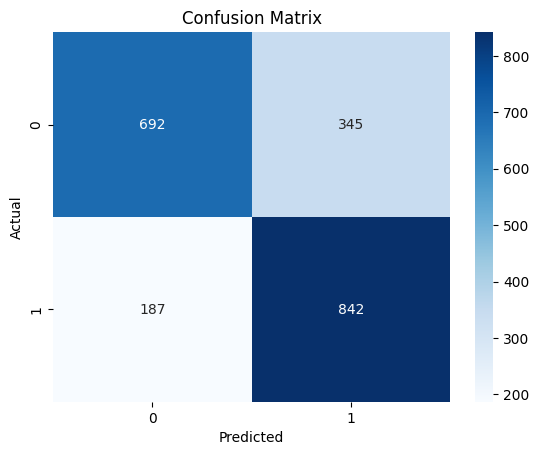

In [183]:
evaluate_model(lr_model, x_test, y_test, "Logistic Regression")

Evaluation for Decision Tree Classifier:
              precision    recall  f1-score   support

          No       0.93      0.79      0.85      1037
         Yes       0.81      0.94      0.87      1029

    accuracy                           0.86      2066
   macro avg       0.87      0.86      0.86      2066
weighted avg       0.87      0.86      0.86      2066

Accuracy: 0.8620522749273959
[[818 219]
 [ 66 963]]


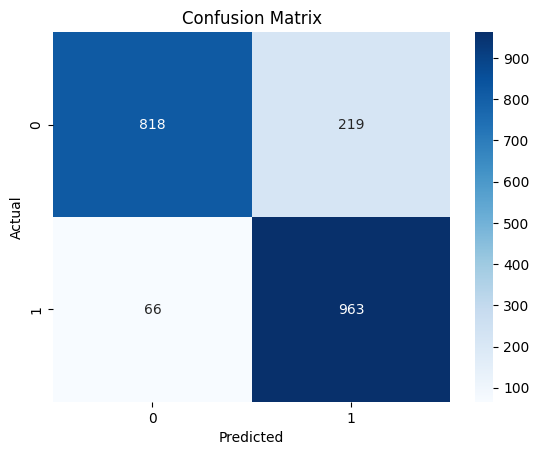

In [184]:
evaluate_model(dt_model, x_test, y_test, "Decision Tree Classifier")

Evaluation for Random Forest Classifier:
              precision    recall  f1-score   support

          No       0.94      0.81      0.87      1037
         Yes       0.83      0.94      0.88      1029

    accuracy                           0.87      2066
   macro avg       0.88      0.87      0.87      2066
weighted avg       0.88      0.87      0.87      2066

Accuracy: 0.8746369796708615
[[835 202]
 [ 57 972]]


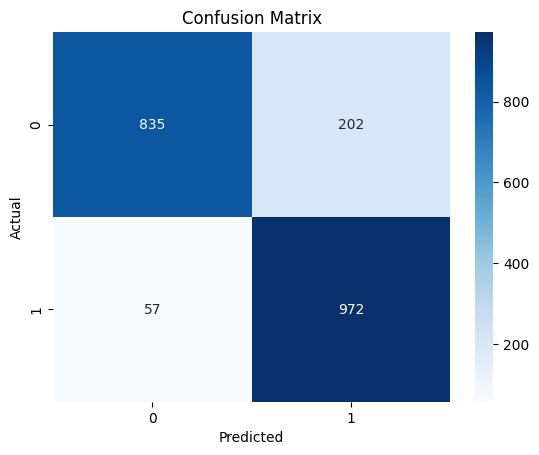

In [185]:
evaluate_model(rf_model, x_test, y_test, "Random Forest Classifier")

Evaluation for Gradient Boosting Classifier:
              precision    recall  f1-score   support

          No       0.79      0.73      0.76      1037
         Yes       0.75      0.81      0.78      1029

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Accuracy: 0.7700871248789932
[[760 277]
 [198 831]]


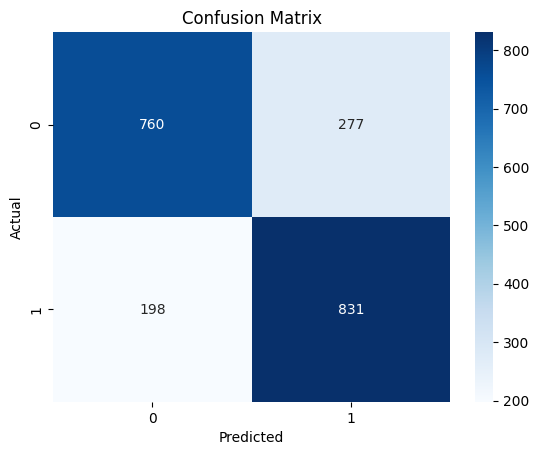

In [186]:
evaluate_model(gb_model, x_test, y_test, "Gradient Boosting Classifier")

In [188]:
import pickle
with open('./models/churn_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('./models/contract_encoder.pkl', 'wb') as file:
    pickle.dump(contract_label_encoder, file)
with open('./models/payment_method_encoder.pkl', 'wb') as file:
    pickle.dump(payment_method_encoder, file)
with open('./models/internet_service_encoder.pkl', 'wb') as file:
    pickle.dump(internet_service_encoder  , file)
